<a href="https://colab.research.google.com/github/GiuliaOrgiana/UnicaIsdeTest/blob/main/MNIST_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', cache=True)

print(mnist.data.shape)

(70000, 784)


(70000, 784) (70000,)
[5 0 4 1 9 2 1 3 1 4]
(28, 28)


Text(0.5, 1.0, 'Label: 5')

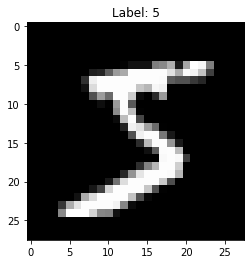

In [7]:
import numpy as np
import matplotlib.pyplot as plt

x = mnist.data
y = np.array(mnist.target, dtype=int)
print(x.shape, y.shape)
print(y[0:10])
i=0
img = x[0, :].reshape(28,28)
print(img.shape)
plt.imshow(img, cmap='gray')
plt.title("Label: "+ str(y[i]))

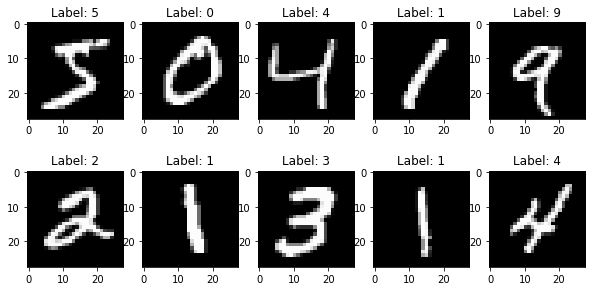

In [3]:
plt.figure(figsize=(10,5))
for i in range(10):
  plt.subplot(2,5, i+1)
  img=x[i,:].reshape(28,28)
  plt.imshow(img, cmap='gray')
  plt.title("Label: "+ str(y[i]))



[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.09861429 0.11252857 0.09985714 0.10201429 0.09748571 0.09018571
 0.09822857 0.10418571 0.0975     0.0994    ]


<BarContainer object of 10 artists>

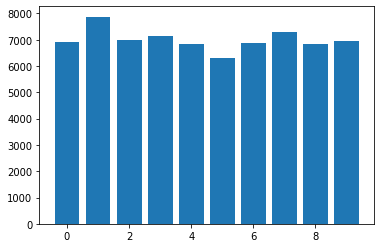

In [4]:
n_classes =10
class_labels=np.unique(y)
n_classes = class_labels.size
n_samples_per_class= np.zeros(shape=(n_classes, ))
print(n_samples_per_class)

for k in range(n_classes):
  n_samples_per_class[k]=np.sum(y==k)

print(n_samples_per_class/ n_samples_per_class.sum())
labels = np.unique(y)
plt.bar(labels,n_samples_per_class)

In [13]:
#data spits: goal is to split X,y into two disjoint sets. 

n_samples = x.shape[0]
n_tr = 10
n_ts = 100
idx = np.random.randint(0,n_samples,n_tr)
print(idx)
#idx = np.array([0,1,4,5])
#extract 1000 random imagies from X matrix -> how do I generate this index vector?
x_trt=x[idx,:]
y_tr = y[idx]

print(x_trt, y_tr)
#input X,y -> output X_tr, y_tr, X_ts, y_ts
# input(0,1,2,3,...6999) -> shuffle -> extract the first n_tr, n_td -<z oputput idx_tr, idx_ts

[25319 57158  7897  5846 16467 29332 61382 45199 48779 26534]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [7 6 2 6 8 9 4 8 4 3]


In [31]:

n_tr = 10
n_ts = 10
#input X,y -> output X_tr, y_tr, X_ts, y_ts
# input(0,1,2,3,...6999) -> shuffle -> extract the first n_tr, n_td -<z oputput idx_tr, idx_ts


def split_data(x,y,n_tr, n_ts):
  n_samples = x.shape[0]
  idx=np.linspace(0,n_samples-1, num=n_samples, dtype=int)
  np.random.shuffle(idx)
  idx_tr = idx[:n_tr]
  idx_ts = idx[n_tr:n_tr+n_ts]
  
  x_tr = x[idx_tr, :]
  y_tr= y[idx_tr]
  x_ts = x[idx_ts, :]
  y_ts= y[idx_ts]
  return x_tr, y_tr, x_ts, y_ts

x_tr, y_tr, x_ts, y_ts = split_data(x,y,n_tr,n_ts)
print(x_tr.shape, x_ts.shape, y_tr, y_ts)

(10, 784) (10, 784) [1 3 5 2 0 9 2 1 5 0] [8 2 5 3 8 9 0 9 3 8]
